     Place   date_time  maxtempC  mintempC  totalSnow_cm  sunHour  uvIndex  \
0  chicago  2008-07-01      23.0      15.0           0.0     14.5      5.0   
1  chicago  2008-07-02      26.0      18.0           0.0     14.5      6.0   
2  chicago  2008-07-03      18.0      15.0           0.0     14.5      5.0   
3  chicago  2008-07-04      20.0      14.0           0.0     14.5      5.0   
4  chicago  2008-07-05      22.0      15.0           0.0     14.5      5.0   

   uvIndex.1  moon_illumination moonrise  ... WindChillC WindGustKmph  \
0        5.0                4.0    03:16  ...       19.0         27.0   
1        6.0                0.0    04:22  ...       22.0         42.0   
2        5.0                0.0    05:39  ...       17.0         30.0   
3        5.0                3.0    06:58  ...       17.0         18.0   
4        5.0               10.0    08:16  ...       20.0         14.0   

  cloudcover  humidity  precipMM  pressure  tempC  visibility  winddirDegree  \
0        6.0

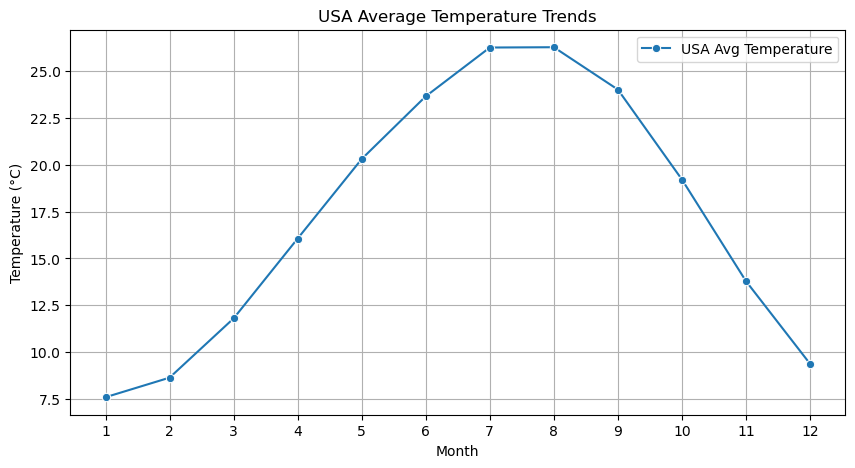

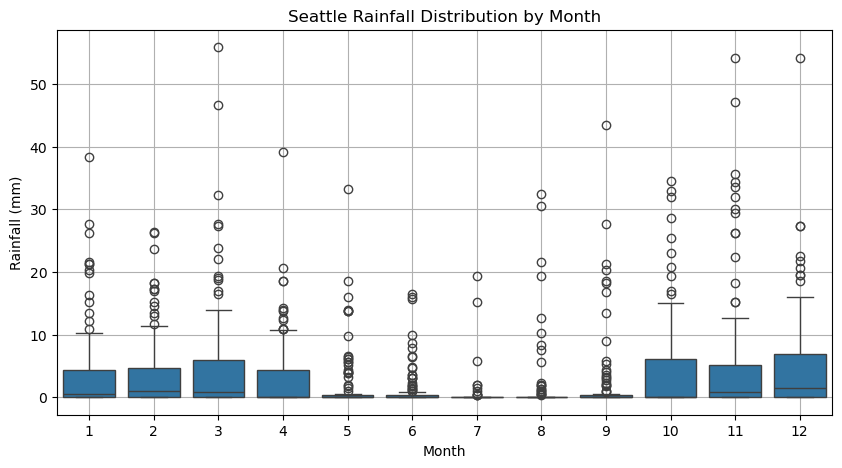

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
global_data = pd.read_csv('C:/Users/pinto/data/cleaned_weather_data.csv')
seattle_data = pd.read_csv('C:/Users/pinto/data/cleaned_seattle_weather.csv')

# Data preview
print(global_data.head())
print(seattle_data.head())

# Convert date columns to datetime
global_data['date_time'] = pd.to_datetime(global_data['date_time'])
seattle_data['date'] = pd.to_datetime(seattle_data['date'])

# Extract month and year for grouping
global_data['Month'] = global_data['date_time'].dt.month
seattle_data['Month'] = seattle_data['date'].dt.month

# USA temperature trends
global_monthly_avg = global_data.groupby('Month')['tempC'].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=global_monthly_avg.index, y=global_monthly_avg.values, marker='o', label='USA Avg Temperature')
plt.title('USA Average Temperature Trends')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(range(1, 13))
plt.legend()
plt.grid()
plt.show()

# Seattle rainfall distribution
plt.figure(figsize=(10, 5))
sns.boxplot(x='Month', y='precipitation', data=seattle_data)
plt.title('Seattle Rainfall Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.xticks(range(0, 12), range(1, 13))
plt.grid()
plt.show()




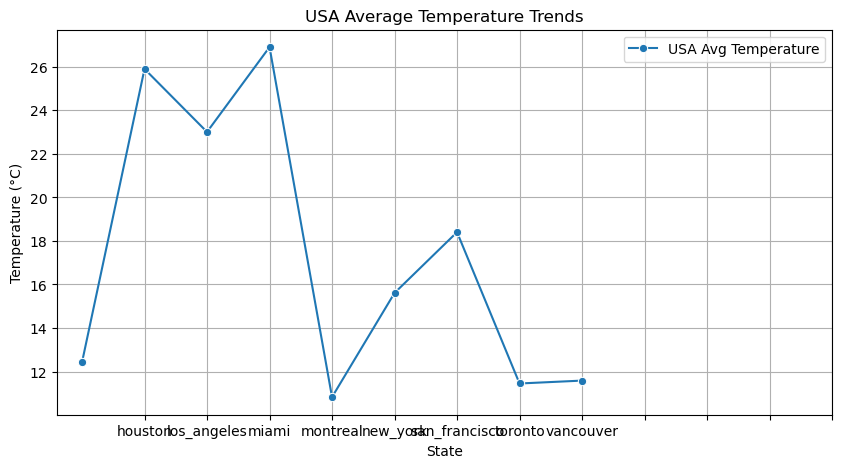

In [8]:
# USA temperature trends
global_monthly_avg = global_data.groupby('Place')['tempC'].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=global_monthly_avg.index, y=global_monthly_avg.values, marker='o', label='USA Avg Temperature')
plt.title('USA Average Temperature Trends')
plt.xlabel('State')
plt.ylabel('Temperature (°C)')
plt.xticks(range(1, 13))
plt.legend()
plt.grid()
plt.show()

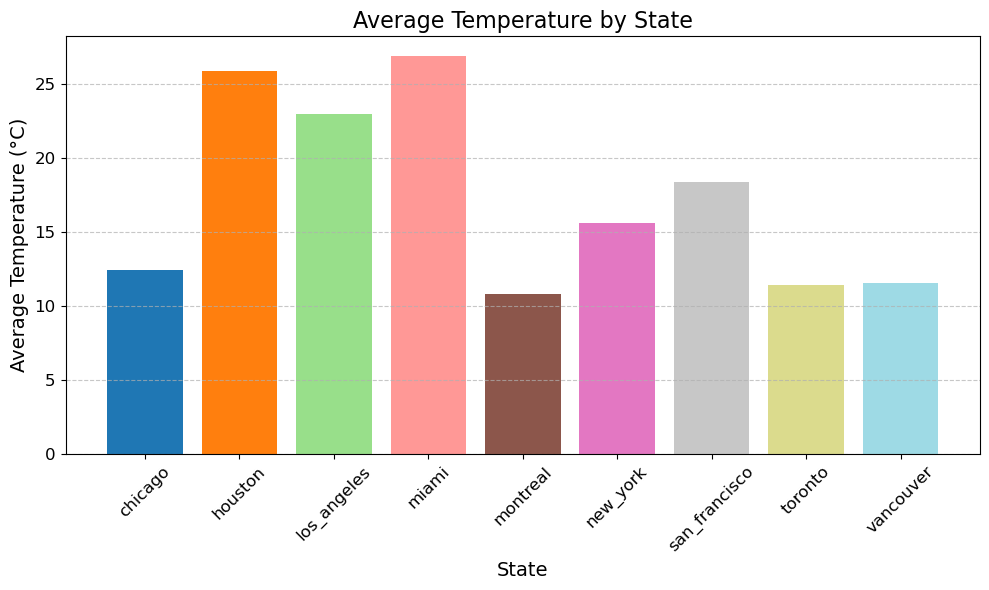

In [4]:
import numpy as np
state_avg_temp = global_data.groupby('Place')['tempC'].mean().reset_index()


colors = plt.cm.tab20(np.linspace(0, 1, len(state_avg_temp)))

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(state_avg_temp['Place'], state_avg_temp['tempC'], color=colors)

# Add titles and labels
plt.title('Average Temperature by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Temperature (C)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, state in enumerate(state_avg_temp['Place']):
    plt.bar([], [], color=colors[i], label=state)  # Empty bars for legend


# Show plot
plt.tight_layout()
plt.show()

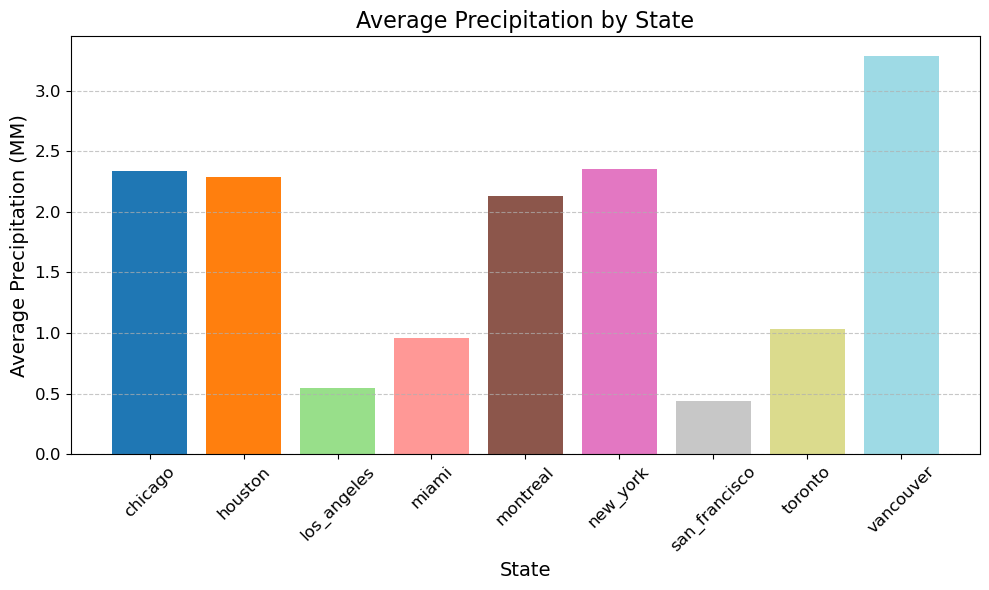

In [5]:
state_avg_prec = global_data.groupby('Place')['precipMM'].mean().reset_index()
colors = plt.cm.tab20(np.linspace(0, 1, len(state_avg_temp)))
# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(state_avg_prec['Place'], state_avg_prec['precipMM'], color=colors)

# Add titles and labels
plt.title('Average Precipitation by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Precipitation (MM)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, state in enumerate(state_avg_temp['Place']):
    plt.bar([], [], color=colors[i], label=state)  # Empty bars for legend
    
# Show plot
plt.tight_layout()
plt.show()

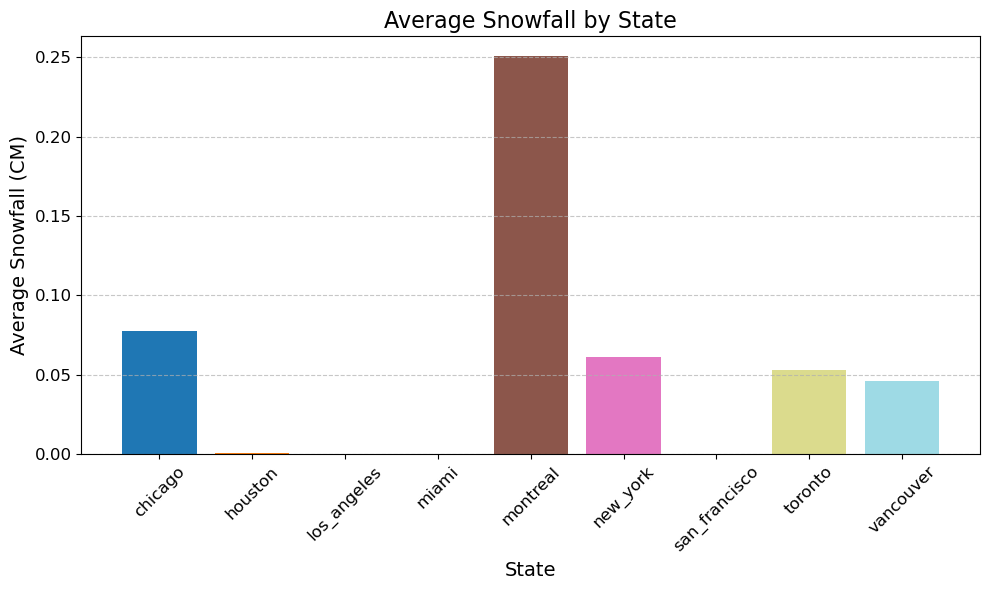

In [6]:
state_avg_snow = global_data.groupby('Place')['totalSnow_cm'].mean().reset_index()
colors = plt.cm.tab20(np.linspace(0, 1, len(state_avg_temp)))
# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(state_avg_snow['Place'], state_avg_snow['totalSnow_cm'], color=colors)

# Add titles and labels
plt.title('Average Snowfall by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Snowfall (CM)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, state in enumerate(state_avg_temp['Place']):
    plt.bar([], [], color=colors[i], label=state)  # Empty bars for legend
    
# Show plot
plt.tight_layout()
plt.show()

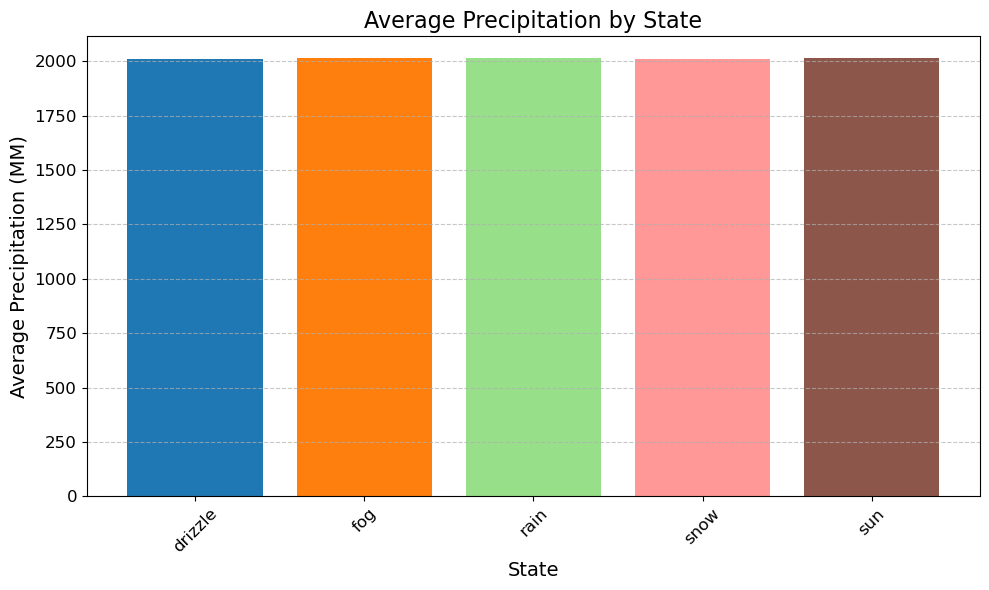

In [7]:

seattle_data['year'] = seattle_data['date'].dt.year

global_avg_weather = seattle_data.groupby('weather')['year'].mean().reset_index()
colors = plt.cm.tab20(np.linspace(0, 1, len(state_avg_temp)))
# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(global_avg_weather['weather'], global_avg_weather['year'], color=colors)

# Add titles and labels
plt.title('Average Precipitation by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Precipitation (MM)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, state in enumerate(state_avg_temp['Place']):
    plt.bar([], [], color=colors[i], label=state)  # Empty bars for legend
    
# Show plot
plt.tight_layout()
plt.show()

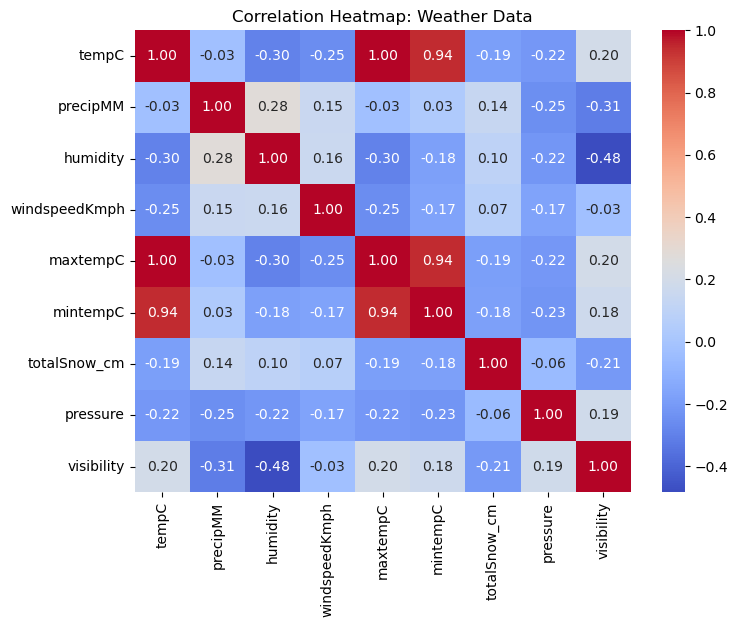

In [10]:
# Correlation heatmap for Seattle data
plt.figure(figsize=(8, 6))
correlation_matrix = global_data[['tempC', 'precipMM', 'humidity', 'windspeedKmph','maxtempC','mintempC','totalSnow_cm','pressure','visibility']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Weather Data')
plt.show()

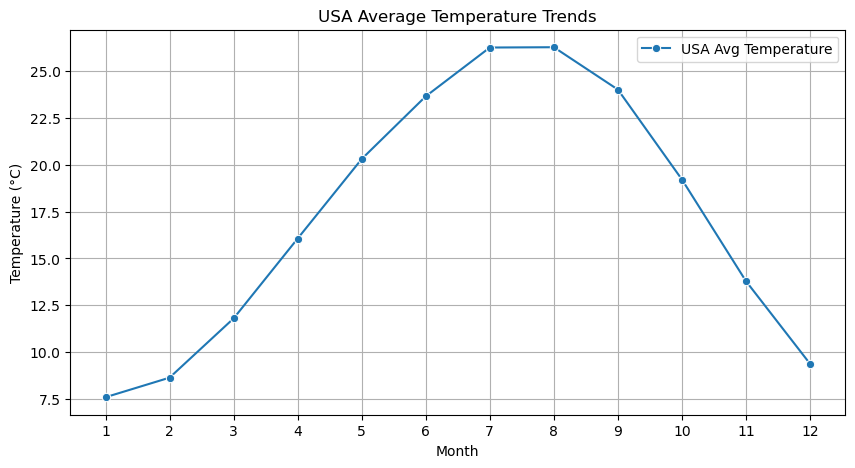

In [9]:
# USA temperature trends
global_monthly_avg = global_data.groupby('Month')['tempC'].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=global_monthly_avg.index, y=global_monthly_avg.values, marker='o', label='USA Avg Temperature')
plt.title('USA Average Temperature Trends')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(range(1, 13))
plt.legend()
plt.grid()
plt.show()




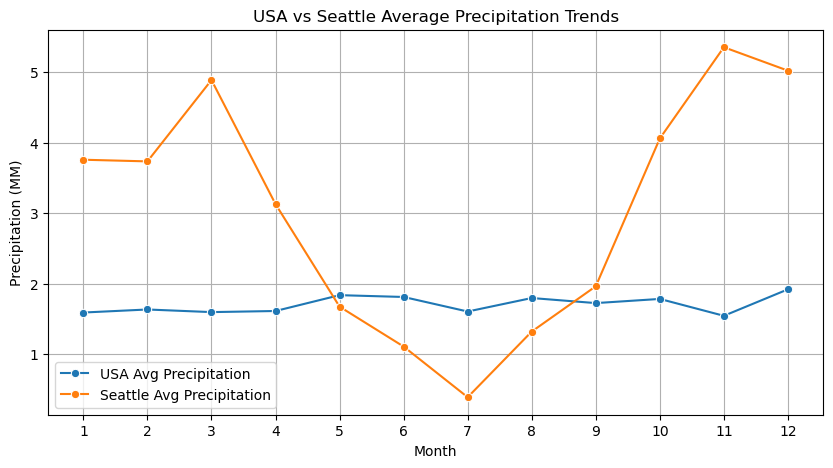

In [5]:
seattle_monthly_avg = seattle_data.groupby('Month')['precipitation'].mean()
global_monthly_avgp = global_data.groupby('Month')['precipMM'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=global_monthly_avgp.index, y=global_monthly_avgp.values, marker='o', label='USA Avg Precipitation')
sns.lineplot(x=seattle_monthly_avg.index, y=seattle_monthly_avg.values, marker='o', label='Seattle Avg Precipitation')
plt.title('USA vs Seattle Average Precipitation Trends')
plt.xlabel('Month')
plt.ylabel('Precipitation (MM)')
plt.xticks(range(1, 13))
plt.legend()
plt.grid()
plt.show()